In [3]:
import pandas as pd
emigration_immigration_rates_df=pd.read_excel("emigration-immigration-rates.xlsx")
world_data_2023_df=pd.read_csv("world-data-2023.csv")

justImportedWorldData = world_data_2023_df.copy(deep=True)
justImportedEmigrationData = emigration_immigration_rates_df.copy(deep=True)
print(emigration_immigration_rates_df.head)
print(emigration_immigration_rates_df.columns)

<bound method NDFrame.head of                    country isoo  year region10_ori iso3  Emigrants_males_HS  \
0              Afghanistan  AFG  2020           SA  AFG              199099   
1                   Angola  AGO  2020          SSA  AGO               52097   
2                  Albania  ALB  2020      ECA-OTH  ALB               73776   
3                  Andorra  AND  2020      ECA-HIC  AND                1608   
4     United Arab Emirates  ARE  2020          GCC  ARE               31501   
..                     ...  ...   ...          ...  ...                 ...   
550  Serbia and Montenegro  YUG  2000      ECA-OTH  YUG              120143   
551           South Africa  ZAF  2000          SSA  ZAF              111792   
552       Congo, Dem. Rep.  ZAR  2000          SSA  ZAR               53992   
553                 Zambia  ZMB  2000          SSA  ZMB               16257   
554               Zimbabwe  ZWE  2000          SSA  ZWE               34579   

     Emigrants_males_

In [4]:
#using the information from https://www.iban.com/country-codes, we create a mapping from the two letter codes to three letter codes
twoToThreeLetterCountryCodeMapping = {
    "AF": "AFG", "AL": "ALB", "DZ": "DZA", "AS": "ASM", "AD": "AND", "AO": "AGO", "AI": "AIA",
    "AQ": "ATA", "AG": "ATG", "AR": "ARG", "AM": "ARM", "AW": "ABW", "AU": "AUS", "AT": "AUT",
    "AZ": "AZE", "BS": "BHS", "BH": "BHR", "BD": "BGD", "BB": "BRB", "BY": "BLR", "BE": "BEL",
    "BZ": "BLZ", "BJ": "BEN", "BM": "BMU", "BT": "BTN", "BO": "BOL", "BQ": "BES", "BA": "BIH",
    "BW": "BWA", "BV": "BVT", "BR": "BRA", "IO": "IOT", "BN": "BRN", "BG": "BGR", "BF": "BFA",
    "BI": "BDI", "CV": "CPV", "KH": "KHM", "CM": "CMR", "CA": "CAN", "KY": "CYM", "CF": "CAF",
    "TD": "TCD", "CL": "CHL", "CN": "CHN", "CX": "CXR", "CC": "CCK", "CO": "COL", "KM": "COM",
    "CD": "COD", "CG": "COG", "CK": "COK", "CR": "CRI", "HR": "HRV", "CU": "CUB", "CW": "CUW",
    "CY": "CYP", "CZ": "CZE", "CI": "CIV", "DK": "DNK", "DJ": "DJI", "DM": "DMA", "DO": "DOM",
    "EC": "ECU", "EG": "EGY", "SV": "SLV", "GQ": "GNQ", "ER": "ERI", "EE": "EST", "SZ": "SWZ",
    "ET": "ETH", "FK": "FLK", "FO": "FRO", "FJ": "FJI", "FI": "FIN", "FR": "FRA", "GF": "GUF",
    "PF": "PYF", "TF": "ATF", "GA": "GAB", "GM": "GMB", "GE": "GEO", "DE": "DEU", "GH": "GHA",
    "GI": "GIB", "GR": "GRC", "GL": "GRL", "GD": "GRD", "GP": "GLP", "GU": "GUM", "GT": "GTM",
    "GG": "GGY", "GN": "GIN", "GW": "GNB", "GY": "GUY", "HT": "HTI", "HM": "HMD", "VA": "VAT",
    "HN": "HND", "HK": "HKG", "HU": "HUN", "IS": "ISL", "IN": "IND", "ID": "IDN", "IR": "IRN",
    "IQ": "IRQ", "IE": "IRL", "IM": "IMN", "IL": "ISR", "IT": "ITA", "JM": "JAM", "JP": "JPN",
    "JE": "JEY", "JO": "JOR", "KZ": "KAZ", "KE": "KEN", "KI": "KIR", "KP": "PRK", "KR": "KOR",
    "KW": "KWT", "KG": "KGZ", "LA": "LAO", "LV": "LVA", "LB": "LBN", "LS": "LSO", "LR": "LBR",
    "LY": "LBY", "LI": "LIE", "LT": "LTU", "LU": "LUX", "MO": "MAC", "MG": "MDG", "MW": "MWI",
    "MY": "MYS", "MV": "MDV", "ML": "MLI", "MT": "MLT", "MH": "MHL", "MQ": "MTQ", "MR": "MRT",
    "MU": "MUS", "YT": "MYT", "MX": "MEX", "FM": "FSM", "MD": "MDA", "MC": "MCO", "MN": "MNG",
    "ME": "MNE", "MS": "MSR", "MA": "MAR", "MZ": "MOZ", "MM": "MMR", "NA": "NAM", "NR": "NRU",
    "NP": "NPL", "NL": "NLD", "NC": "NCL", "NZ": "NZL", "NI": "NIC", "NE": "NER", "NG": "NGA",
    "NU": "NIU", "NF": "NFK", "MP": "MNP", "NO": "NOR", "OM": "OMN", "PK": "PAK", "PW": "PLW",
    "PS": "PSE", "PA": "PAN", "PG": "PNG", "PY": "PRY", "PE": "PER", "PH": "PHL", "PN": "PCN",
    "PL": "POL", "PT": "PRT", "PR": "PRI", "QA": "QAT", "MK": "MKD", "RO": "ROU", "RU": "RUS",
    "RW": "RWA", "RE": "REU", "BL": "BLM", "SH": "SHN", "KN": "KNA", "LC": "LCA", "MF": "MAF",
    "PM": "SPM", "VC": "VCT", "WS": "WSM", "SM": "SMR", "ST": "STP", "SA": "SAU", "SN": "SEN",
    "RS": "SRB", "SC": "SYC", "SL": "SLE", "SG": "SGP", "SX": "SXM", "SK": "SVK", "SI": "SVN",
    "SB": "SLB", "SO": "SOM", "ZA": "ZAF", "GS": "SGS", "SS": "SSD", "ES": "ESP", "LK": "LKA",
    "SD": "SDN", "SR": "SUR", "SJ": "SJM", "SE": "SWE", "CH": "CHE", "SY": "SYR", "TW": "TWN",
    "TJ": "TJK", "TZ": "TZA", "TH": "THA", "TL": "TLS", "TG": "TGO", "TK": "TKL", "TO": "TON",
    "TT": "TTO", "TN": "TUN", "TR": "TUR", "TM": "TKM", "TC": "TCA", "TV": "TUV", "UG": "UGA",
    "UA": "UKR", "AE": "ARE", "GB": "GBR", "UM": "UMI", "US": "USA", "UY": "URY", "UZ": "UZB",
    "VU": "VUT", "VE": "VEN", "VN": "VNM", "VG": "VGB", "VI": "VIR", "WF": "WLF", "EH": "ESH",
    "YE": "YEM", "ZM": "ZMB", "ZW": "ZWE", "AX": "ALA"}

world_data_2023_df["iso3"] = world_data_2023_df["Abbreviation"].map(twoToThreeLetterCountryCodeMapping)
world_data_2023_df["GDP"] = world_data_2023_df["GDP"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Minimum wage"] = world_data_2023_df["Minimum wage"].str.replace("$","").str.replace(",","").astype(float)
world_data_2023_df["Unemployment rate"] = world_data_2023_df["Unemployment rate"].str.replace("%","").astype(float)
world_data_2023_df["OOP health expenditure"] = world_data_2023_df["Out of pocket health expenditure"].str.replace("%","").astype(float)
world_data_2023_df["Primary education enrollment"] = world_data_2023_df["Gross primary education enrollment (%)"].str.replace("%","").astype(float)
world_data_2023_df["Tertiary education enrollment"] = world_data_2023_df["Gross tertiary education enrollment (%)"].str.replace("%","").astype(float)

In [5]:
emigrants_immagrants_totals_2020_df = emigration_immigration_rates_df[emigration_immigration_rates_df["year"] == 2020][["iso3","Emigrants_total","Immigrants_total","emig_rate","immig_rate", "emig_rate_female","emig_rate_male","Emigrants_014_male","popm014","Emigrants_014_female", "popf014","Emigrants_014_total", "Labor"  ]]
emigrants_immagrants_totals_2020_df["iso3"] = emigrants_immagrants_totals_2020_df["iso3"].replace("ZAR","COD")

In [6]:
columnsFromWorldData = world_data_2023_df[["iso3",
                                           "Birth Rate",
                                           "Infant mortality",
                                           "Physicians per thousand",
                                           "Life expectancy",
                                           "OOP health expenditure",
                                           "GDP",
                                           "Unemployment rate",
                                           "Minimum wage",
                                           "Primary education enrollment",
                                           "Tertiary education enrollment"]]

columnsFromEmigrationImmigrationData = emigrants_immagrants_totals_2020_df

In [7]:
combinedColumns = pd.merge(columnsFromWorldData,columnsFromEmigrationImmigrationData, on="iso3")
columnTitles = ["Birth Rate",
                "Infant mortality",
                "Physicians per thousand",
                "Life expectancy",
                "OOP health expenditure",
                "GDP",
                "Unemployment rate",
                "Minimum wage",
                "Primary education enrollment",
                "Tertiary education enrollment",
                "Emigrants_total",
                "Immigrants_total",
                "emig_rate",
                "immig_rate",
               ]

In [8]:
#all of the above code was done by Ian (used in correlation graph)
#used for consistency in data

In [9]:
combinedColumns=combinedColumns.dropna()
#eliminating na values

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     6.777
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0103
Time:                        19:44:58   Log-Likelihood:                 130.18
No. Observations:                 132   AIC:                            -256.4
Df Residuals:                     130   BIC:                            -250.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.945      0.0

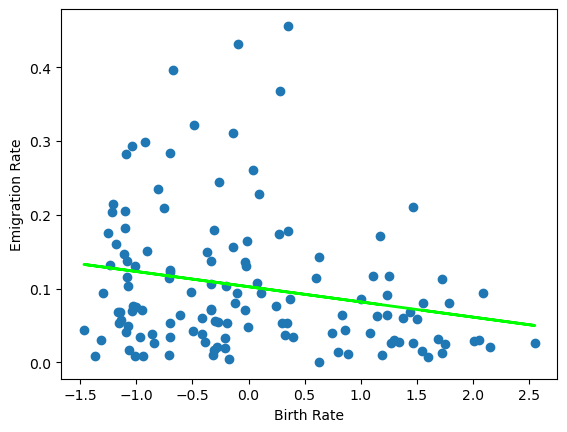

In [10]:
!pip install statsmodels
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

variables=["Birth Rate"]
X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="lime", linewidth=2)
plt.xlabel("Birth Rate")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Birth Rate(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.671
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0575
Time:                        19:44:58   Log-Likelihood:                 128.67
No. Observations:                 132   AIC:                            -253.3
Df Residuals:                     130   BIC:                            -247.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.797      0.0

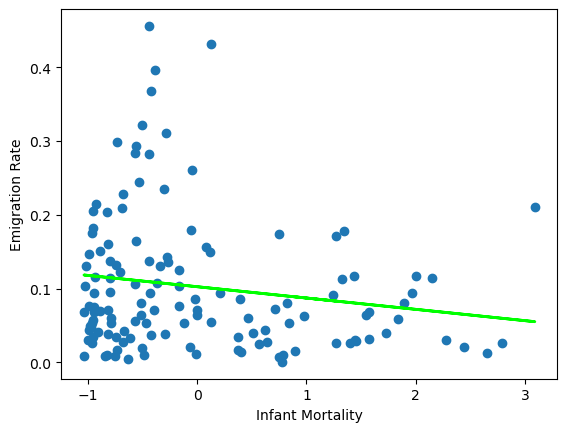

In [11]:
variables=["Infant mortality"]
                
X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="lime", linewidth=2)
plt.xlabel("Infant Mortality")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Infant Mortality(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.384
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.125
Time:                        19:44:58   Log-Likelihood:                 128.03
No. Observations:                 132   AIC:                            -252.1
Df Residuals:                     130   BIC:                            -246.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.735      0.0

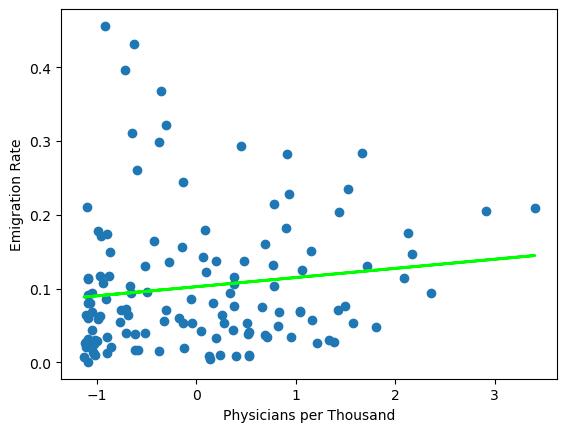

In [12]:
variables=["Physicians per thousand"]
                
X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="lime", linewidth=2)
plt.xlabel("Physicians per Thousand")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Physicians per Thousand(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9825
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.323
Time:                        19:44:58   Log-Likelihood:                 127.32
No. Observations:                 132   AIC:                            -250.6
Df Residuals:                     130   BIC:                            -244.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.667      0.0

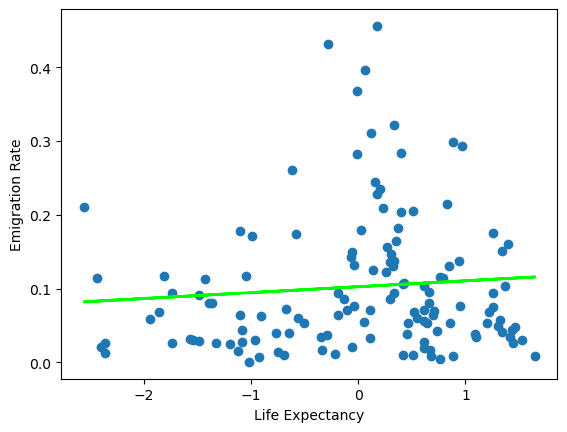

In [13]:
variables=["Life expectancy"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="lime", linewidth=2)
plt.xlabel("Life Expectancy")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Life Expectancy(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.880
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.173
Time:                        19:44:59   Log-Likelihood:                 127.78
No. Observations:                 132   AIC:                            -251.6
Df Residuals:                     130   BIC:                            -245.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.711      0.0

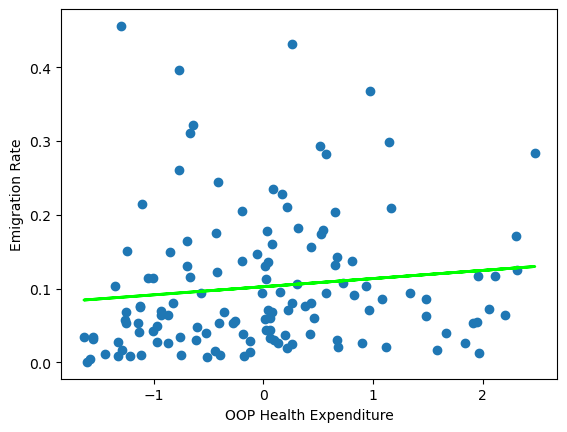

In [14]:
variables=["OOP health expenditure"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="lime", linewidth=2)
plt.xlabel("OOP Health Expenditure")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of OOP Health Expenditure(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.222
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0239
Time:                        19:44:59   Log-Likelihood:                 129.43
No. Observations:                 132   AIC:                            -254.9
Df Residuals:                     130   BIC:                            -249.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.871      0.0

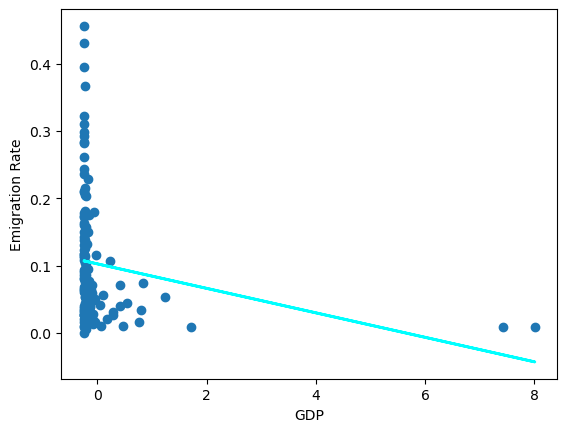

In [15]:
variables=["GDP"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="cyan", linewidth=2)
plt.xlabel("GDP")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#unscaled GDP

#Linear Regression of GDP(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     33.24
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.63e-08
Time:                        19:44:59   Log-Likelihood:                 141.85
No. Observations:                 132   AIC:                            -279.7
Df Residuals:                     130   BIC:                            -273.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.007     14.141      0.0

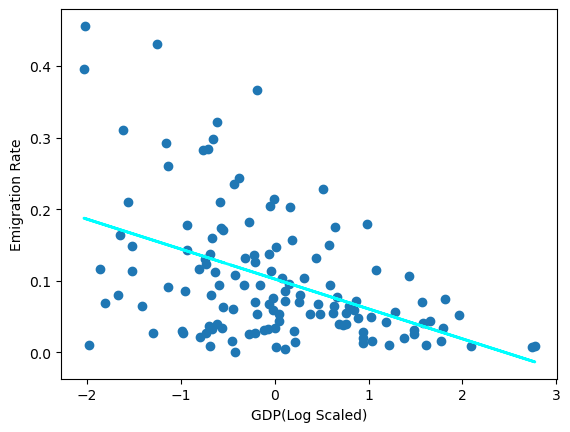

In [16]:
variables=["GDP"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

X=np.log(X)
#transforms GDP using a log to better fit the data

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="cyan", linewidth=2)
plt.xlabel("GDP(Log Scaled)")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of GDP(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     5.815
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0173
Time:                        19:45:00   Log-Likelihood:                 129.72
No. Observations:                 132   AIC:                            -255.4
Df Residuals:                     130   BIC:                            -249.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.899      0.0

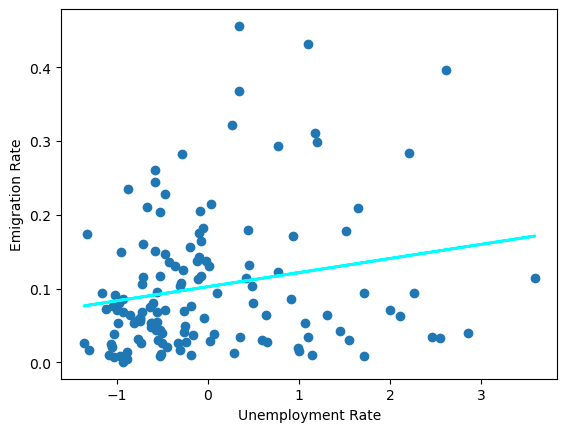

In [17]:
variables=["Unemployment rate"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="cyan", linewidth=2)
plt.xlabel("Unemployment Rate")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Unemployment Rate(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.365
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.127
Time:                        19:45:00   Log-Likelihood:                 128.02
No. Observations:                 132   AIC:                            -252.0
Df Residuals:                     130   BIC:                            -246.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.734      0.0

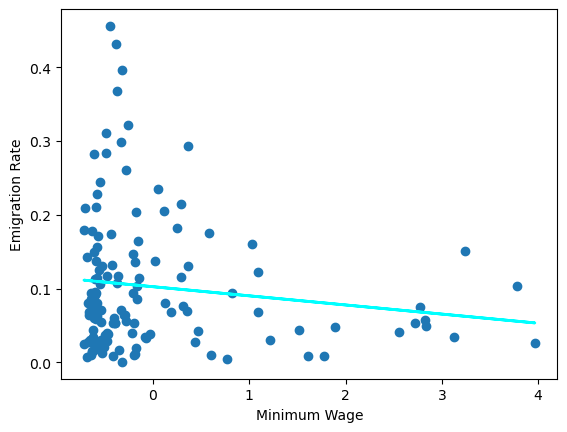

In [18]:
variables=["Minimum wage"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="cyan", linewidth=2)
plt.xlabel("Minimum Wage")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Minimum Wage(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.050
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.155
Time:                        19:45:00   Log-Likelihood:                 127.86
No. Observations:                 132   AIC:                            -251.7
Df Residuals:                     130   BIC:                            -246.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.719      0.0

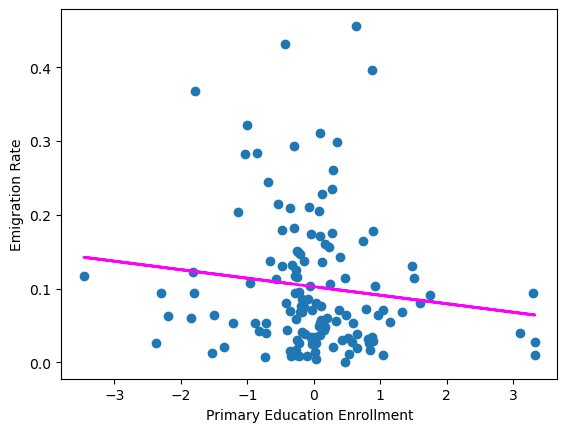

In [19]:
variables=["Primary education enrollment"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="magenta", linewidth=2)
plt.xlabel("Primary Education Enrollment")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Primary Education Enrollment(X) and Emigration Rate(Y)

                            OLS Regression Results                            
Dep. Variable:              emig_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                 0.0008073
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.977
Time:                        19:45:00   Log-Likelihood:                 126.83
No. Observations:                 132   AIC:                            -249.7
Df Residuals:                     130   BIC:                            -243.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.008     12.620      0.0

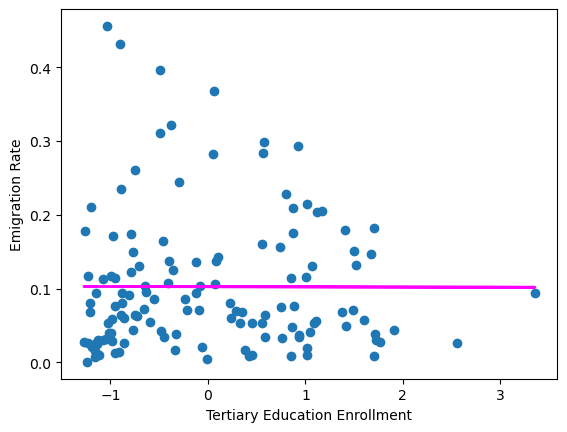

In [20]:
variables=["Tertiary education enrollment"]

X=combinedColumns[variables]
Y=combinedColumns["emig_rate"]

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_with_constant=sm.add_constant(X)
model=sm.OLS(Y,X_with_constant)
regression_results=model.fit()
print(regression_results.summary())

predicted_Y = regression_results.predict(X_with_constant)
plt.plot(X, predicted_Y, color="magenta", linewidth=2)
plt.xlabel("Tertiary Education Enrollment")
plt.ylabel("Emigration Rate")
plt.scatter(X,Y)
plt.show()

#Linear Regression of Tertiary Education Enrollment(X) and Emigration Rate(Y)